In [583]:
from IPython.display import display,HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

# Extraction

In [584]:
import os
print(os.listdir("amesterdam_files"))

['listings.csv', 'reviews_details.csv', 'calendar.csv', 'listings_details.csv', 'reviews.csv', '.ipynb_checkpoints']


In [585]:
import pandas as pd
listings = pd.read_csv('amesterdam_files/listings.csv',low_memory=False)
listings_details=pd.read_csv('amesterdam_files/listings_details.csv',low_memory=False)

In [587]:
listings_details.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

# Pandas Transformations

In [588]:
target_columns = [
     'id','street',
    'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
    'neighbourhood_cleansed', 'property_type',
     'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
    'square_feet',  'weekly_price', 'monthly_price', 'security_deposit',
    'cleaning_fee', 
    'maximum_nights', 'availability_30', 'availability_60', 'availability_90',
    'review_scores_rating',
    'review_scores_cleanliness',
     'review_scores_value', 
    'instant_bookable',  'cancellation_policy',
]






In [589]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [590]:
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
#listings.info()

In [591]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'street', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'neighbourhood_cleansed', 'property_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

# Pandas Cleaning

In [592]:
#placing NaN values with 0
listings.review_scores_rating.fillna(0, inplace=True)
listings.reviews_per_month.fillna(0, inplace=True)
listings.host_listings_count.fillna(0, inplace=True)
listings.review_scores_cleanliness.fillna(0, inplace=True)
listings.review_scores_value.fillna(0, inplace=True)
#listings.last_review.fillna('unknown_date', inplace=True)
listings.host_response_time.fillna('within a few hours',inplace=True)

# Spark Session

In [593]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.types import *

In [594]:
spark=SparkSession.builder.\
appName('amsterdam').\
getOrCreate()

In [595]:
df_listing=spark.createDataFrame(listings) #without schema
#df_neighb=spark.createDataFrame(neighbourhoods)

In [596]:
df_listing.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: long (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: double (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: long (nullable = true)
 |-- minimum_nights: long (nullable = true)
 |-- number_of_reviews: long (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: long (nullable = true)
 |-- availability_365: long (nullable = true)
 |-- street: string (nullable = true)
 |-- host_response_time: string (nullable = true)
 |-- host_response_rate: string (nullable = true)
 |-- host_acceptance_rate: double (nullable = true)
 |-- host_is_superhost: string (nullable = true)
 |-- host_listings_count: double (nullable = true)
 |-- host_total_l

In [597]:
df_listing.schema

StructType([StructField('id', LongType(), True), StructField('name', StringType(), True), StructField('host_id', LongType(), True), StructField('host_name', StringType(), True), StructField('neighbourhood_group', DoubleType(), True), StructField('neighbourhood', StringType(), True), StructField('latitude', DoubleType(), True), StructField('longitude', DoubleType(), True), StructField('room_type', StringType(), True), StructField('price', LongType(), True), StructField('minimum_nights', LongType(), True), StructField('number_of_reviews', LongType(), True), StructField('last_review', StringType(), True), StructField('reviews_per_month', DoubleType(), True), StructField('calculated_host_listings_count', LongType(), True), StructField('availability_365', LongType(), True), StructField('street', StringType(), True), StructField('host_response_time', StringType(), True), StructField('host_response_rate', StringType(), True), StructField('host_acceptance_rate', DoubleType(), True), StructFiel

In [598]:
schema_listings=StructType([StructField('id', IntegerType(), True), 
                            StructField('name', StringType(), True), 
                            StructField('host_id', IntegerType(), True), 
                            StructField('host_name', StringType(), True), 
                            StructField('neighbourhood_group', FloatType(), True), 
                            StructField('neighbourhood', StringType(), True), 
                            StructField('latitude', FloatType(), True), 
                            StructField('longitude', FloatType(), True), 
                            StructField('room_type', StringType(), True), 
                            StructField('price', IntegerType(), True), 
                            StructField('minimum_nights', IntegerType(), True), 
                            StructField('number_of_reviews', IntegerType(), True), 
                            StructField('last_review', StringType(), True), 
                            StructField('reviews_per_month', FloatType(), True), 
                            StructField('calculated_host_listings_count', IntegerType(), True), 
                            StructField('availability_365', IntegerType(), True), 
                            StructField('street', StringType(), True),   
                            StructField('host_response_time', StringType(), True), 
                            StructField('host_response_rate', StringType(), True), 
                            StructField('host_acceptance_rate', StringType(), True), 
                            StructField('host_is_superhost', StringType(), True), 
                            StructField('host_listings_count', FloatType(), True), 
                            StructField('host_total_listings_count', FloatType(), True), 
                            StructField('neighbourhood_cleansed', StringType(), True), 
                            StructField('property_type', StringType(), True), 
                            StructField('accommodates', IntegerType(), True), 
                            StructField('bathrooms', FloatType(), True), 
                            StructField('bedrooms', FloatType(), True), 
                            StructField('beds', FloatType(), True), 
                            StructField('amenities', StringType(), True), 
                            StructField('square_feet', FloatType(), True), 
                            StructField('weekly_price', StringType(), True), 
                            StructField('monthly_price', StringType(), True), 
                            StructField('security_deposit', StringType(), True), 
                            StructField('cleaning_fee', StringType(), True),  
                            StructField('maximum_nights', IntegerType(), True), 
                            StructField('availability_30', IntegerType(), True), 
                            StructField('availability_60', IntegerType(), True), 
                            StructField('availability_90', IntegerType(), True), 
                            StructField('review_scores_rating', FloatType(), True), 
                            StructField('review_scores_cleanliness', FloatType(), True),  
                            StructField('review_scores_value', FloatType(), True), 
                            StructField('instant_bookable', StringType(), True), 
                            StructField('cancellation_policy', StringType(), True)])

# Spark Cleaning

In [599]:
df_listing=spark.createDataFrame(listings,schema=schema_listings)
df_listing.show()

23/12/31 20:40:12 WARN TaskSetManager: Stage 1710 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-----+--------------------+-------+---------+-------------------+--------------------+---------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+--------------------+------------------+------------------+--------------------+-----------------+-------------------+-------------------------+----------------------+-----------------+------------+---------+--------+----+--------------------+-----------+------------+-------------+----------------+------------+--------------+---------------+---------------+---------------+--------------------+-------------------------+-------------------+----------------+--------------------+
|   id|                name|host_id|host_name|neighbourhood_group|       neighbourhood| latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|              street|host_response_time

In [600]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20030 non-null  int64  
 1   name                            19992 non-null  object 
 2   host_id                         20030 non-null  int64  
 3   host_name                       20026 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   20030 non-null  object 
 6   latitude                        20030 non-null  float64
 7   longitude                       20030 non-null  float64
 8   room_type                       20030 non-null  object 
 9   price                           20030 non-null  int64  
 10  minimum_nights                  20030 non-null  int64  
 11  number_of_reviews               20030 non-null  int64  
 12  last_review                     

# Dropping some columns

In [601]:
#we have all neighbourhood_group as nan so we are going to dop this column
df_non_nan_neighb=df_listing.filter(~f.isnan(f.col('neighbourhood_group'))).count()
df_non_nan_neighb

23/12/31 20:40:13 WARN TaskSetManager: Stage 1711 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


0

In [602]:
df_non_nan_host_acceptance_rate=df_listing.filter(~f.isnan(f.col('host_acceptance_rate'))).count()
df_non_nan_host_acceptance_rate

23/12/31 20:40:14 WARN TaskSetManager: Stage 1714 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


0

In [603]:
drop_columns=['neighbourhood_group','host_acceptance_rate']
df_listing=df_listing.drop(*drop_columns)
df_listing.show(1)

23/12/31 20:40:15 WARN TaskSetManager: Stage 1717 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+----+--------------------+-------+---------+--------------------+---------+---------+------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+--------------------+------------------+------------------+-----------------+-------------------+-------------------------+----------------------+-------------+------------+---------+--------+----+--------------------+-----------+------------+-------------+----------------+------------+--------------+---------------+---------------+---------------+--------------------+-------------------------+-------------------+----------------+--------------------+
|  id|                name|host_id|host_name|       neighbourhood| latitude|longitude|   room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|              street|host_response_time|host_response_rate|host_is_superhost|host_listings_count|host_total_list

In [604]:
df_listing.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: float (nullable = true)
 |-- longitude: float (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: float (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- street: string (nullable = true)
 |-- host_response_time: string (nullable = true)
 |-- host_response_rate: string (nullable = true)
 |-- host_is_superhost: string (nullable = true)
 |-- host_listings_count: float (nullable = true)
 |-- host_total_listings_count: float (nullable = true)
 |-- neighbourhood_cleansed: string (nullable =

# Replacing some column-values 

In [605]:
df_listing = df_listing.withColumn(
    'host_is_superhost',
    f.when(f.col('host_is_superhost') == 't', 'True')
    .otherwise('False')
)

In [606]:
df_listing = df_listing.withColumn(
    'instant_bookable',
    f.when(f.col('instant_bookable') == 't', 'True')
    .otherwise('False')
)

In [607]:
df_listing.cache()

DataFrame[id: int, name: string, host_id: int, host_name: string, neighbourhood: string, latitude: float, longitude: float, room_type: string, price: int, minimum_nights: int, number_of_reviews: int, last_review: string, reviews_per_month: float, calculated_host_listings_count: int, availability_365: int, street: string, host_response_time: string, host_response_rate: string, host_is_superhost: string, host_listings_count: float, host_total_listings_count: float, neighbourhood_cleansed: string, property_type: string, accommodates: int, bathrooms: float, bedrooms: float, beds: float, amenities: string, square_feet: float, weekly_price: string, monthly_price: string, security_deposit: string, cleaning_fee: string, maximum_nights: int, availability_30: int, availability_60: int, availability_90: int, review_scores_rating: float, review_scores_cleanliness: float, review_scores_value: float, instant_bookable: string, cancellation_policy: string]

In [608]:
df_listing.show(truncate=False)

23/12/31 20:40:16 WARN TaskSetManager: Stage 1718 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-----+--------------------------------------------------+-------+---------+--------------------------------------+---------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+-------------------------------------+------------------+------------------+-----------------+-------------------+-------------------------+--------------------------------------+-----------------+------------+---------+--------+----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

23/12/31 20:40:17 WARN TaskSetManager: Stage 1719 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


# Dropping dollar symbol from some columns

In [609]:
df_listing=df_listing.withColumn('weekly_price',f.regexp_replace(f.col('weekly_price'),'\$',''))
df_listing=df_listing.withColumn('monthly_price',f.regexp_replace(f.col('monthly_price'),'\$',''))
df_listing=df_listing.withColumn('security_deposit',f.regexp_replace(f.col('security_deposit'),'\$',''))
df_listing=df_listing.withColumn('cleaning_fee',f.regexp_replace(f.col('cleaning_fee'),'\$',''))
df_listing=df_listing.withColumn('host_response_rate', f.regexp_extract(f.col('host_response_rate'), r'(\d+)', 1))



# Dropping nan values in a specific column

In [610]:
df_listing = df_listing.dropna(subset=['host_name'])

In [611]:
nan_rows = df_listing.filter(f.isnan(f.col('host_name')))
nan_rows.show()

23/12/31 20:40:18 WARN TaskSetManager: Stage 1720 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:18 WARN TaskSetManager: Stage 1721 contains a task of very large size (2745 KiB). The maximum recommended task size is 1000 KiB.


+--------+--------------------+---------+---------+-------------+---------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+--------------------+------------------+------------------+-----------------+-------------------+-------------------------+----------------------+-------------+------------+---------+--------+----+--------------------+-----------+------------+-------------+----------------+------------+--------------+---------------+---------------+---------------+--------------------+-------------------------+-------------------+----------------+--------------------+
|      id|                name|  host_id|host_name|neighbourhood| latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|              street|host_response_time|host_response_rate|host_is_superhost|host_listings_count|host_total_

In [612]:
nan_columns=[6345018,10227700,13585881,18661034,21892378]

df_listing = df_listing.filter(~f.col('id').isin(nan_columns))
df_listing.filter(f.isnan(f.col('host_name'))).show()

23/12/31 20:40:18 WARN TaskSetManager: Stage 1722 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:18 WARN TaskSetManager: Stage 1723 contains a task of very large size (2745 KiB). The maximum recommended task size is 1000 KiB.


+---+----+-------+---------+-------------+--------+---------+---------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+------+------------------+------------------+-----------------+-------------------+-------------------------+----------------------+-------------+------------+---------+--------+----+---------+-----------+------------+-------------+----------------+------------+--------------+---------------+---------------+---------------+--------------------+-------------------------+-------------------+----------------+-------------------+
| id|name|host_id|host_name|neighbourhood|latitude|longitude|room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|street|host_response_time|host_response_rate|host_is_superhost|host_listings_count|host_total_listings_count|neighbourhood_cleansed|property_type|accommodates|bathrooms|bedrooms|beds|amenities|s

# Casting

In [613]:
df_listing=df_listing.withColumn('beds',f.col('beds').cast('integer'))
df_listing=df_listing.withColumn('bathrooms',f.col('bathrooms').cast('integer'))
df_listing=df_listing.withColumn('bedrooms',f.col('bedrooms').cast('integer'))
df_listing=df_listing.withColumn('weekly_price',f.col('weekly_price').cast('integer'))
df_listing=df_listing.withColumn('monthly_price',f.col('monthly_price').cast('integer'))
df_listing=df_listing.withColumn('security_deposit',f.col('security_deposit').cast('integer'))
df_listing=df_listing.withColumn('cleaning_fee',f.col('cleaning_fee').cast('integer'))
df_listing = df_listing.withColumn("last_review",f.from_utc_timestamp("last_review", "UTC"))
df_listing=df_listing.withColumn('host_response_rate',f.col('host_response_rate').cast('float'))
df_listing=df_listing.withColumn('host_is_superhost',f.col('host_is_superhost').cast('boolean'))
df_listing=df_listing.withColumn('Instant_bookable',f.col('Instant_bookable').cast('boolean'))
df_listing.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: float (nullable = true)
 |-- longitude: float (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- last_review: timestamp (nullable = true)
 |-- reviews_per_month: float (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- street: string (nullable = true)
 |-- host_response_time: string (nullable = true)
 |-- host_response_rate: float (nullable = true)
 |-- host_is_superhost: boolean (nullable = true)
 |-- host_listings_count: float (nullable = true)
 |-- host_total_listings_count: float (nullable = true)
 |-- neighbourhood_cleansed: string (nullabl

# Replacing nan values with the average values 

In [614]:
#replacing nan values by the average of beds
df_non_nan=df_listing.na.drop(subset=['beds'])
df_avg_beds=df_non_nan.agg(f.avg('beds').alias('average_of_beds'))
df_avg_beds.show()


#replacing nan values by the average of bedrooms 
df_non_nan=df_listing.na.drop(subset=['bedrooms'])
df_avg_bedrooms=df_non_nan.agg(f.avg('bedrooms').alias('average_of_bedrooms'))
df_avg_bedrooms.show()



#replacing nan values by the average of bathrooms
df_non_nan=df_listing.na.drop(subset=['bathrooms'])
df_avg_bathrooms=df_non_nan.agg(f.avg('bathrooms').alias('average_of_bathrooms'))
df_avg_bathrooms.show()





#replacing nan values by the average of weekly_price
df_non_nan=df_listing.na.drop(subset=['weekly_price'])
df_avg_weekly_price=df_non_nan.agg(f.avg('weekly_price').alias('average_of_weekly_price'))
df_avg_weekly_price.show()





#replacing nan values by the average of monthly_price
df_non_nan=df_listing.na.drop(subset=['monthly_price'])
df_avg_monthly_price=df_non_nan.agg(f.avg('monthly_price').alias('average_of_monthly_price'))
df_avg_monthly_price.show()



#replacing nan values by the average of security_deposit
df_non_nan=df_listing.na.drop(subset=['security_deposit'])
df_avg_security_deposit=df_non_nan.agg(f.avg('security_deposit').alias('average_of_security_deposit'))
df_avg_security_deposit.show()



#replacing nan values by the average of cleaning_fee
df_non_nan=df_listing.na.drop(subset=['cleaning_fee'])
df_avg_cleaning_fee=df_non_nan.agg(f.avg('cleaning_fee').alias('average_of_cleaning_fee'))
df_avg_cleaning_fee.show()


#replacing nan values by the average of square_feet 
df_non_nan=df_listing.na.drop(subset=['square_feet'])
df_avg_square_feet=df_non_nan.agg(f.avg('square_feet').alias('average_of_square_feet'))
df_avg_square_feet.show()


#replacing nan values by the average of square_feet 
df_non_nan=df_listing.na.drop(subset=['host_response_rate'])
df_avg_host_response_rate=df_non_nan.agg(f.avg('host_response_rate').alias('average_of_host_response_rate'))
df_avg_host_response_rate.show()



#replacing nan values by the average of square_feet 
df_non_nan=df_listing.na.drop(subset=['host_total_listings_count'])
df_average_of_host_total_listings_count=df_non_nan.agg(f.avg('host_total_listings_count').alias('average_of_host_total_listings_count'))
df_average_of_host_total_listings_count.show()

average_of_beds = df_avg_beds.first()['average_of_beds']
average_of_bedrooms=df_avg_bedrooms.first()['average_of_bedrooms']
average_of_bathrooms=df_avg_bathrooms.first()['average_of_bathrooms']
average_of_weekly_price=df_avg_weekly_price.first()['average_of_weekly_price']
average_of_monthly_price=df_avg_monthly_price.first()['average_of_monthly_price']
average_of_security_deposit=df_avg_security_deposit.first()['average_of_security_deposit']
average_of_cleaning_fee=df_avg_cleaning_fee.first()['average_of_cleaning_fee']
average_of_square_feet=df_avg_square_feet.first()['average_of_square_feet']
average_of_host_response_rate=df_avg_host_response_rate.first()['average_of_host_response_rate']
average_of_host_total_listings_count=df_average_of_host_total_listings_count.first()['average_of_host_total_listings_count']


23/12/31 20:40:19 WARN TaskSetManager: Stage 1724 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+------------------+
|   average_of_beds|
+------------------+
|1.8486392009987516|
+------------------+



23/12/31 20:40:19 WARN TaskSetManager: Stage 1727 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:19 WARN TaskSetManager: Stage 1730 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+
|average_of_bedrooms|
+-------------------+
| 1.4444943820224718|
+-------------------+

+--------------------+
|average_of_bathrooms|
+--------------------+
|  1.0710611735330837|
+--------------------+



23/12/31 20:40:20 WARN TaskSetManager: Stage 1733 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-----------------------+
|average_of_weekly_price|
+-----------------------+
|      635.8341685649202|
+-----------------------+



23/12/31 20:40:21 WARN TaskSetManager: Stage 1736 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+------------------------+
|average_of_monthly_price|
+------------------------+
|       842.7413793103449|
+------------------------+



23/12/31 20:40:21 WARN TaskSetManager: Stage 1739 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+---------------------------+
|average_of_security_deposit|
+---------------------------+
|          179.4029129820911|
+---------------------------+



23/12/31 20:40:21 WARN TaskSetManager: Stage 1742 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-----------------------+
|average_of_cleaning_fee|
+-----------------------+
|     39.275748521251295|
+-----------------------+



23/12/31 20:40:22 WARN TaskSetManager: Stage 1745 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+----------------------+
|average_of_square_feet|
+----------------------+
|     520.4852216748768|
+----------------------+



23/12/31 20:40:22 WARN TaskSetManager: Stage 1748 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-----------------------------+
|average_of_host_response_rate|
+-----------------------------+
|            93.75535748150958|
+-----------------------------+

+------------------------------------+
|average_of_host_total_listings_count|
+------------------------------------+
|                   6.106067415730337|
+------------------------------------+



23/12/31 20:40:23 WARN TaskSetManager: Stage 1751 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:23 WARN TaskSetManager: Stage 1754 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:23 WARN TaskSetManager: Stage 1757 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:23 WARN TaskSetManager: Stage 1760 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:23 WARN TaskSetManager: Stage 1763 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:24 WARN TaskSetManager: Stage 1766 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:24 WARN TaskSetManager: Stage 1769 contains a task of very large size (2796 KiB). The maximum recommended task size is 10

In [615]:
df_listing = df_listing.withColumn(
    'beds',
    f.when((f.isnan('beds') | f.isnull('beds')),int(average_of_beds)).otherwise(f.col('beds')))


df_listing = df_listing.withColumn(
    'bedrooms',
    f.when((f.isnan('bedrooms') | f.isnull('bedrooms')), int(average_of_bedrooms)).otherwise(f.col('bedrooms')))


df_listing = df_listing.withColumn(
    'bathrooms',
    f.when((f.isnan('bathrooms') | f.isnull('bathrooms')), int(average_of_bathrooms)).otherwise(f.col('bathrooms')))


df_listing = df_listing.withColumn(
    'weekly_price',
    f.when((f.isnan('weekly_price') | f.isnull('weekly_price')), int(average_of_weekly_price)).otherwise(f.col('weekly_price')))

df_listing = df_listing.withColumn(
    'monthly_price',
    f.when((f.isnan('monthly_price') | f.isnull('monthly_price')), int(average_of_monthly_price)).otherwise(f.col('monthly_price')))


df_listing = df_listing.withColumn(
    'security_deposit',
    f.when((f.isnan('security_deposit') | f.isnull('security_deposit')), int(average_of_security_deposit)).otherwise(f.col('security_deposit')))


df_listing = df_listing.withColumn(
    'cleaning_fee',
    f.when((f.isnan('cleaning_fee') | f.isnull('cleaning_fee')), int(average_of_cleaning_fee)).otherwise(f.col('cleaning_fee')))


df_listing = df_listing.withColumn(
    'square_feet',
    f.when((f.isnan('square_feet') | f.isnull('square_feet')), int(average_of_square_feet)).otherwise(f.col('square_feet')))


df_listing = df_listing.withColumn(
    'host_response_rate',
    f.when((f.isnan('host_response_rate') | f.isnull('host_response_rate')), int(average_of_host_response_rate)).otherwise(f.col('host_response_rate')))

df_listing = df_listing.withColumn(
    'host_total_listings_count',
    f.when((f.isnan('host_total_listings_count') | f.isnull('host_total_listings_count')), int(average_of_host_response_rate)).otherwise(f.col('host_response_rate')))

df_listing.cache()

DataFrame[id: int, name: string, host_id: int, host_name: string, neighbourhood: string, latitude: float, longitude: float, room_type: string, price: int, minimum_nights: int, number_of_reviews: int, last_review: timestamp, reviews_per_month: float, calculated_host_listings_count: int, availability_365: int, street: string, host_response_time: string, host_response_rate: float, host_is_superhost: boolean, host_listings_count: float, host_total_listings_count: float, neighbourhood_cleansed: string, property_type: string, accommodates: int, bathrooms: int, bedrooms: int, beds: int, amenities: string, square_feet: float, weekly_price: int, monthly_price: int, security_deposit: int, cleaning_fee: int, maximum_nights: int, availability_30: int, availability_60: int, availability_90: int, review_scores_rating: float, review_scores_cleanliness: float, review_scores_value: float, Instant_bookable: boolean, cancellation_policy: string]

In [616]:
df_listing = df_listing.na.fill(average_of_host_response_rate, subset=['Host_response_rate'])

In [617]:
df_listing.show(1,truncate=False)

23/12/31 20:40:26 WARN TaskSetManager: Stage 1784 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+----+----------------------------------------+-------+---------+--------------------------------------+---------+---------+------------+-----+--------------+-----------------+-------------------+-----------------+------------------------------+----------------+-------------------------------------+------------------+------------------+-----------------+-------------------+-------------------------+--------------------------------------+-------------+------------+---------+--------+----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

23/12/31 20:40:27 WARN TaskSetManager: Stage 1785 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


# Rename column-names

In [618]:
current_col = df_listing.columns
new_col = [
    'Listing_id', 'Listing_name', 'Host_id', 'Host_name', 'Neighborhood', 'Latitude', 'Longitude',
    'Room_type', 'Price', 'Min_nights', 'Num_reviews', 'Last_review', 'Reviews_per_month','calculated_host_listings_count'
, 'Availability_365', 'Street_address',  'Host_response_time', 'Host_response_rate', 'Superhost_status','Host_listings_count',
     'Host_total_listings_count', 'Cleansed_neighborhood', 'Property_type',
    'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Square_feet', 'Weekly_price($)',
    'Monthly_price($)', 'Security_deposit($)', 'Cleaning_fee($)','Max_nights', 'Availability_30', 'Availability_60', 'Availability_90',
    'Review_scores_rating',  'Review_scores_cleanliness',
    'Review_scores_value', 'Instant_bookable','Cancellation_policy'
]


for old,new in zip(current_col,new_col):
    df_listing=df_listing.withColumnRenamed(old,new)
df_listing.cache()
df_listing.show(truncate=False)

23/12/31 20:40:28 WARN TaskSetManager: Stage 1786 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+----------+--------------------------------------------------+-------+---------+--------------------------------------+---------+---------+---------------+-----+----------+-----------+-------------------+-----------------+------------------------------+----------------+-------------------------------------+------------------+------------------+----------------+-------------------+-------------------------+--------------------------------------+-----------------+------------+---------+--------+----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

23/12/31 20:40:29 WARN TaskSetManager: Stage 1787 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


In [619]:
df_listing.printSchema()

root
 |-- Listing_id: integer (nullable = true)
 |-- Listing_name: string (nullable = true)
 |-- Host_id: integer (nullable = true)
 |-- Host_name: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Latitude: float (nullable = true)
 |-- Longitude: float (nullable = true)
 |-- Room_type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Min_nights: integer (nullable = true)
 |-- Num_reviews: integer (nullable = true)
 |-- Last_review: timestamp (nullable = true)
 |-- Reviews_per_month: float (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- Availability_365: integer (nullable = true)
 |-- Street_address: string (nullable = true)
 |-- Host_response_time: string (nullable = true)
 |-- Host_response_rate: float (nullable = false)
 |-- Superhost_status: boolean (nullable = true)
 |-- Host_listings_count: float (nullable = true)
 |-- Host_total_listings_count: float (nullable = true)
 |-- Cleansed_neighborhood: str

# Pricing Analysis:

In [620]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

23/12/31 20:40:30 WARN TaskSetManager: Stage 1788 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:31 WARN TaskSetManager: Stage 1791 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+------------------+
|        neighborhood|     average_price|
+--------------------+------------------+
|           Oud-Noord|157.68476357267951|
|De Baarsjes - Oud...|143.84921763869133|
|       Bos en Lommer|116.99475524475524|
|              Osdorp| 97.98101265822785|
|        Centrum-Oost|189.45112781954887|
|De Pijp - Riviere...|157.17849979943844|
|          Westerpark|141.00402684563758|
|            Oud-Oost|143.39859594383776|
|Geuzenveld - Slot...|125.73584905660377|
|Oostelijk Havenge...|126.08967674661105|
|                Zuid|171.12699514226233|
|        Centrum-West|189.88774193548386|
|          Noord-Oost|         118.59375|
|          Noord-West|        120.171875|
|IJburg - Zeeburge...| 165.1570796460177|
|De Aker - Nieuw S...|124.71126760563381|
|     Watergraafsmeer| 137.5144927536232|
|        Bijlmer-Oost|101.60416666666667|
|     Bijlmer-Centrum| 91.21621621621621|
|Gaasperdam - Drie...| 92.12295081967213|
+--------------------+------------

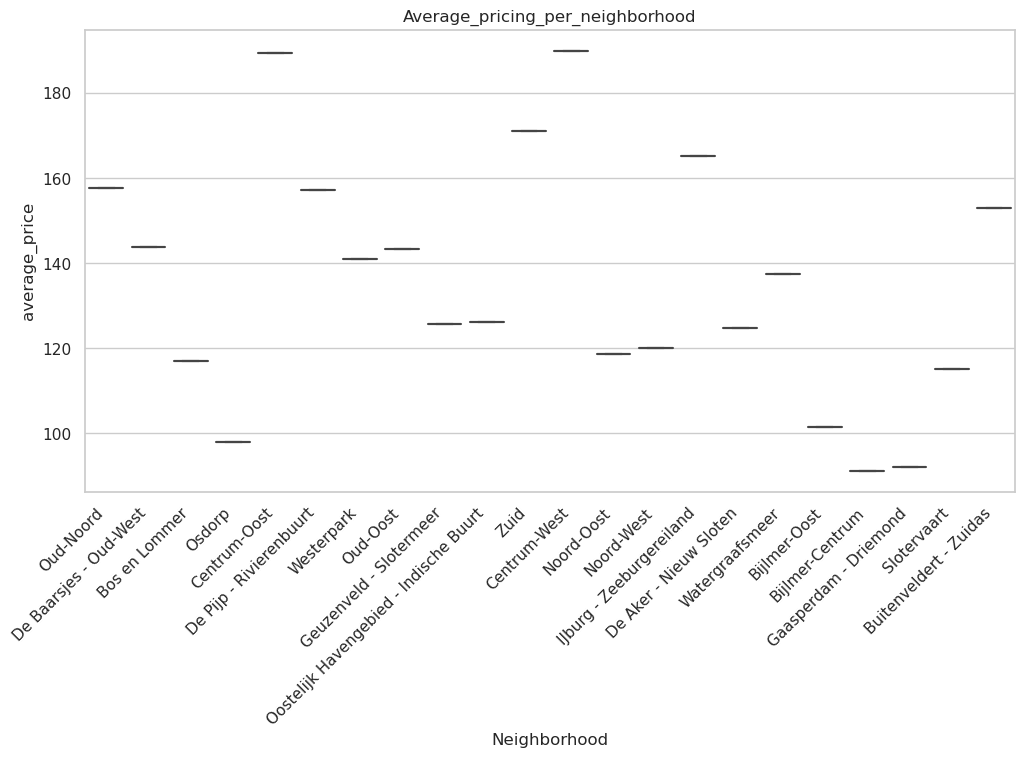

In [621]:
#Average pricing per neighborhood.
Average_pricing_per_neighborhood=df_listing.groupBy('neighborhood').agg(f.avg(f.col('price')).alias('average_price'))
Average_pricing_per_neighborhood_pd=Average_pricing_per_neighborhood.toPandas()

Average_pricing_per_neighborhood.show()

# Explore pricing variations based on property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighborhood', y='average_price', data=Average_pricing_per_neighborhood_pd)
plt.title('Average_pricing_per_neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('average_price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

23/12/31 20:40:32 WARN TaskSetManager: Stage 1794 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:32 WARN TaskSetManager: Stage 1797 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+------------------+------------------+
|     property_type|   average_pricing|
+------------------+------------------+
|         Apartment|145.72828808010783|
|         Townhouse|194.51617873651773|
|       Guest suite|117.52631578947368|
|    Boutique hotel|148.03571428571428|
|              Loft|206.82291666666666|
|        Guesthouse|117.65116279069767|
|            Hostel|             97.25|
|        Lighthouse|             850.0|
|             Villa|          219.0625|
|             Other|207.98039215686273|
|Serviced apartment| 265.6190476190476|
|             Hotel|224.85714285714286|
|      Nature lodge|             140.0|
|       Condominium|140.22291021671828|
|             House|171.94214332675872|
|            Chalet| 84.33333333333333|
|              Boat| 193.0779569892473|
|        Tiny house|              79.8|
|         Houseboat|205.23111111111112|
|          Bungalow|            135.75|
+------------------+------------------+
only showing top 20 rows



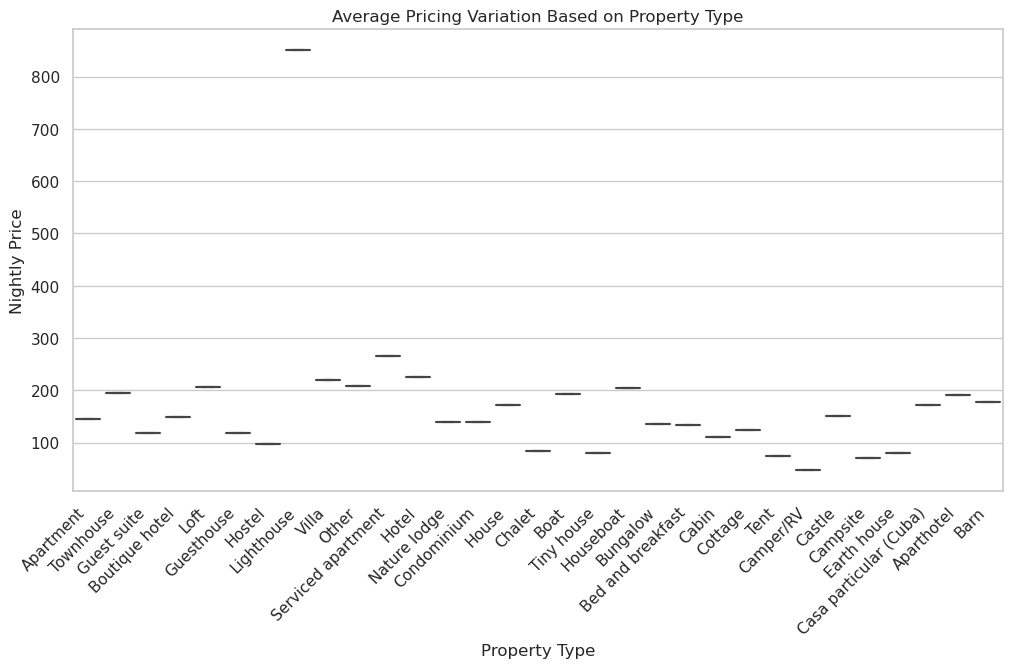

In [622]:
#Distribution of prices for different property types (entire home, private room, shared room).

avg_price_per_property=df_listing.groupBy('property_type').agg(f.avg(f.col('price')).alias('average_pricing'))
avg_price_per_property_pd=avg_price_per_property.toPandas()




avg_price_per_property.show()


# Average pricing variations based on property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='average_pricing', data=avg_price_per_property_pd)
plt.title('Average Pricing Variation Based on Property Type')
plt.xlabel('Property Type')
plt.ylabel('Nightly Price')
plt.xticks(rotation=45, ha='right') 
plt.show()









In [623]:
#Identify the most expensive and cheapest listings.

df_listing.orderBy(f.col('price').desc()).select(f.col('listing_name').alias('The most expensive listing')).limit(1).show(truncate=False)

df_listing.orderBy(f.col('price').asc()).select(f.col('listing_name').alias('The most cheapest listing')).limit(1).show(truncate=False)



23/12/31 20:40:34 WARN TaskSetManager: Stage 1800 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:34 WARN TaskSetManager: Stage 1801 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+--------------------------------------+
|The most expensive listing            |
+--------------------------------------+
|Comfy double room right to city center|
+--------------------------------------+

+---------------------------------------+
|The most cheapest listing              |
+---------------------------------------+
|Modern light studio with all amenities!|
+---------------------------------------+



# Distribution of property types:

23/12/31 20:40:34 WARN TaskSetManager: Stage 1802 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:35 WARN TaskSetManager: Stage 1810 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+------------------+-----+
|     property_type|count|
+------------------+-----+
|         Apartment|15579|
|             House| 1521|
|         Townhouse|  649|
| Bed and breakfast|  455|
|              Loft|  384|
|              Boat|  372|
|       Condominium|  323|
|         Houseboat|  225|
|       Guest suite|  152|
|        Aparthotel|   73|
|Serviced apartment|   63|
|             Other|   51|
|        Guesthouse|   43|
|             Villa|   32|
|    Boutique hotel|   28|
|             Cabin|   14|
|          Bungalow|   12|
|           Cottage|   12|
|             Hotel|    7|
|        Tiny house|    5|
+------------------+-----+
only showing top 20 rows



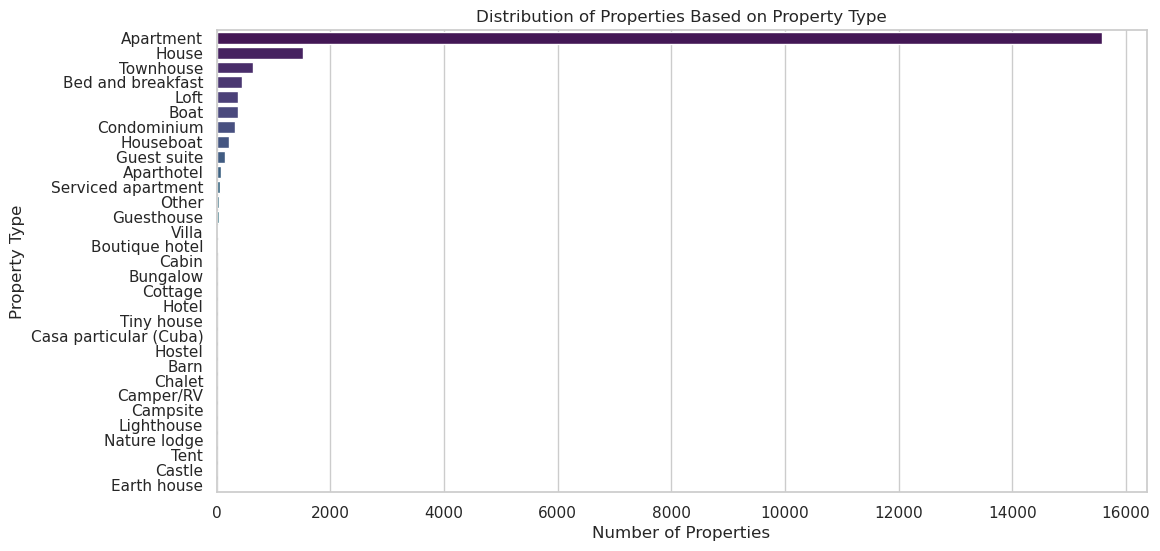

In [624]:
Distribution_of_properites=df_listing.groupBy('property_type').count().orderBy('count',ascending=False)
Distribution_of_properites_pd=Distribution_of_properites.toPandas()

Distribution_of_properites.show()

sns.set(style="whitegrid")

# Plot the distribution of properties
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='property_type', data=Distribution_of_properites_pd, palette='viridis')
plt.title('Distribution of Properties Based on Property Type')
plt.xlabel('Number of Properties')
plt.ylabel('Property Type')
plt.show()

In [625]:
correlation_result = df_listing.select(f.corr("square_feet", "price")).first()[0]
print(f"Correlation between square_feet and price: {correlation_result}")

Correlation between square_feet and price: 0.03156282275832878


23/12/31 20:40:36 WARN TaskSetManager: Stage 1813 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


# Availability Analysis:

23/12/31 20:40:36 WARN TaskSetManager: Stage 1816 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:36 WARN TaskSetManager: Stage 1824 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+---------------------+
|        neighborhood|avg_availability_year|
+--------------------+---------------------+
|De Aker - Nieuw S...|   105.33802816901408|
|Gaasperdam - Drie...|    99.89344262295081|
|        Centrum-West|    91.24387096774194|
|              Osdorp|    89.21518987341773|
|        Centrum-Oost|    87.30884904569115|
|Geuzenveld - Slot...|    82.72641509433963|
|          Noord-Oost|          79.73046875|
|        Bijlmer-Oost|    73.39583333333333|
|Buitenveldert - Z...|    67.70610687022901|
|           Oud-Noord|    65.79509632224168|
|                Zuid|    65.54545454545455|
|          Noord-West|             64.61875|
|IJburg - Zeeburge...|      64.570796460177|
|     Watergraafsmeer|    52.56159420289855|
|De Pijp - Riviere...|   50.950661853188926|
|         Slotervaart|   49.592875318066156|
|     Bijlmer-Centrum|   46.648648648648646|
|De Baarsjes - Oud...|     46.1601706970128|
|Oostelijk Havenge...|    44.80709071949948|
|         

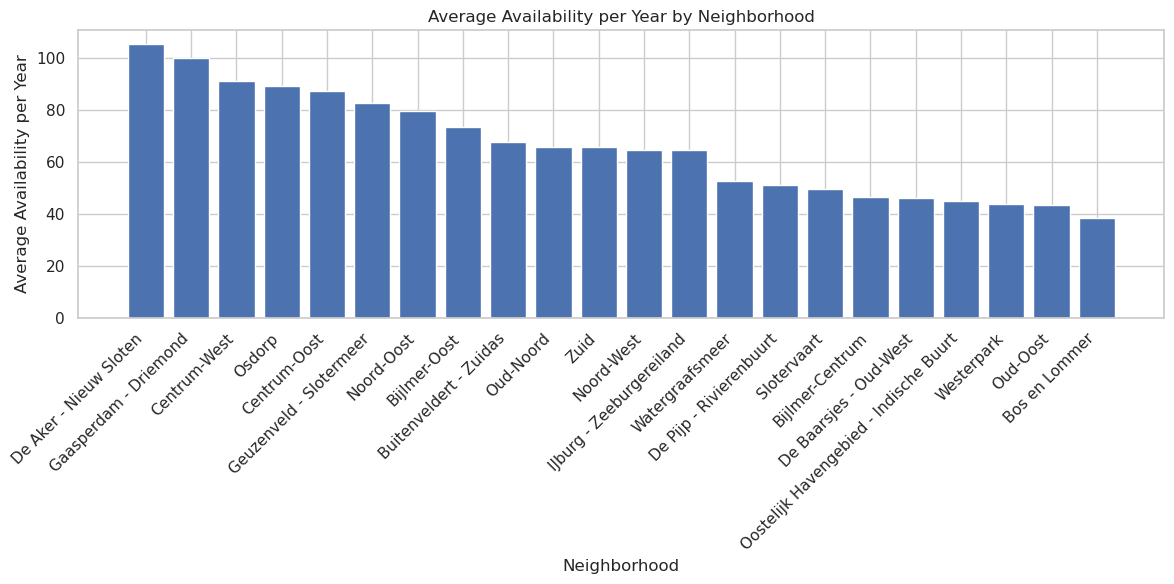

In [626]:
#Average availability per neighborhood throughout the year


Average_availability_per_neighborhood =df_listing.groupBy('neighborhood')\
        .agg(f.avg(f.col('availability_365')).alias('avg_availability_year'))\
        .orderBy('avg_availability_year', ascending=False)


Average_availability_per_neighborhood_pd=Average_availability_per_neighborhood.toPandas()

Average_availability_per_neighborhood.show()

plt.figure(figsize=(12, 6))
plt.bar(Average_availability_per_neighborhood_pd['neighborhood'], Average_availability_per_neighborhood_pd['avg_availability_year'])
plt.title('Average Availability per Year by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Availability per Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()





In [627]:
#the relationship between minimum nights and availability.

relation=df_listing.select('min_nights','availability_365')
relation.summary().show()


23/12/31 20:40:37 WARN TaskSetManager: Stage 1827 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-------+------------------+------------------+
|summary|        min_nights|  availability_365|
+-------+------------------+------------------+
|  count|             20025|             20025|
|   mean| 3.328938826466916| 59.91360799001249|
| stddev|12.538961015390745|104.02401084985715|
|    min|                 1|                 0|
|    25%|                 2|                 0|
|    50%|                 2|                 3|
|    75%|                 3|                67|
|    max|              1001|               365|
+-------+------------------+------------------+



In [628]:
#Identify properties with high availability throughout the year.

23/12/31 20:40:39 WARN TaskSetManager: Stage 1830 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:39 WARN TaskSetManager: Stage 1838 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+----------------+
|       property_type|max_availability|
+--------------------+----------------+
|           Apartment|             365|
|                Loft|             365|
|  Serviced apartment|             365|
|               Hotel|             365|
|         Condominium|             365|
|               House|             365|
|                Boat|             365|
|            Bungalow|             365|
|   Bed and breakfast|             365|
|          Aparthotel|             365|
|           Townhouse|             364|
|         Guest suite|             364|
|               Other|             364|
|           Houseboat|             363|
|      Boutique hotel|             362|
|          Lighthouse|             362|
|               Villa|             360|
|          Guesthouse|             359|
|Casa particular (...|             352|
|               Cabin|             328|
+--------------------+----------------+
only showing top 20 rows



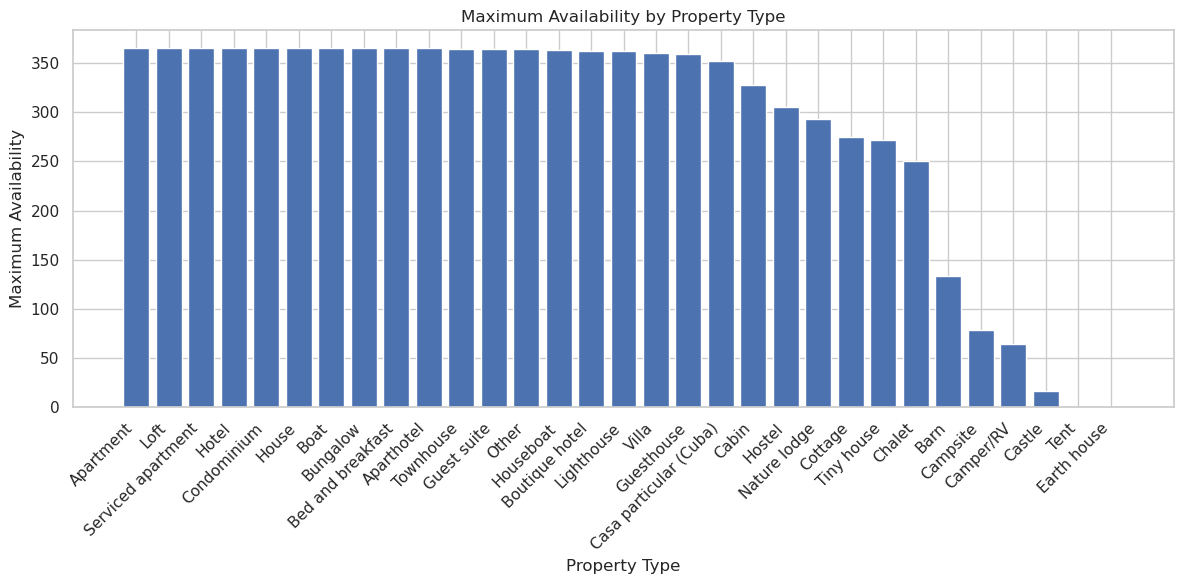

In [629]:
property_with_h_availability=df_listing.groupBy('property_type')\
        .agg(f.max('availability_365').alias('max_availability'))\
        .orderBy('max_availability',ascending=False)\


property_with_h_availability_pd=property_with_h_availability.toPandas()

property_with_h_availability.show()


# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(property_with_h_availability_pd['property_type'], property_with_h_availability_pd['max_availability'])
plt.title('Maximum Availability by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Maximum Availability')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




# Host Analysis:

23/12/31 20:40:40 WARN TaskSetManager: Stage 1841 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:41 WARN TaskSetManager: Stage 1849 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+----------------+-------------+
|       host_name|listing_count|
+----------------+-------------+
|         Martijn|          289|
|Michiel And Jane|          105|
|           Laura|           98|
|            Anne|           90|
|         Marieke|           88|
|             Eva|           88|
|          Willem|           87|
|           Rated|           83|
|          Thomas|           80|
|           David|           77|
|           Peter|           76|
|          Jeroen|           75|
|             Tim|           75|
|           Joost|           75|
|            Paul|           73|
|         Maarten|           72|
|         Michiel|           72|
|          Wouter|           71|
|            Mark|           70|
|             Jan|           69|
+----------------+-------------+
only showing top 20 rows



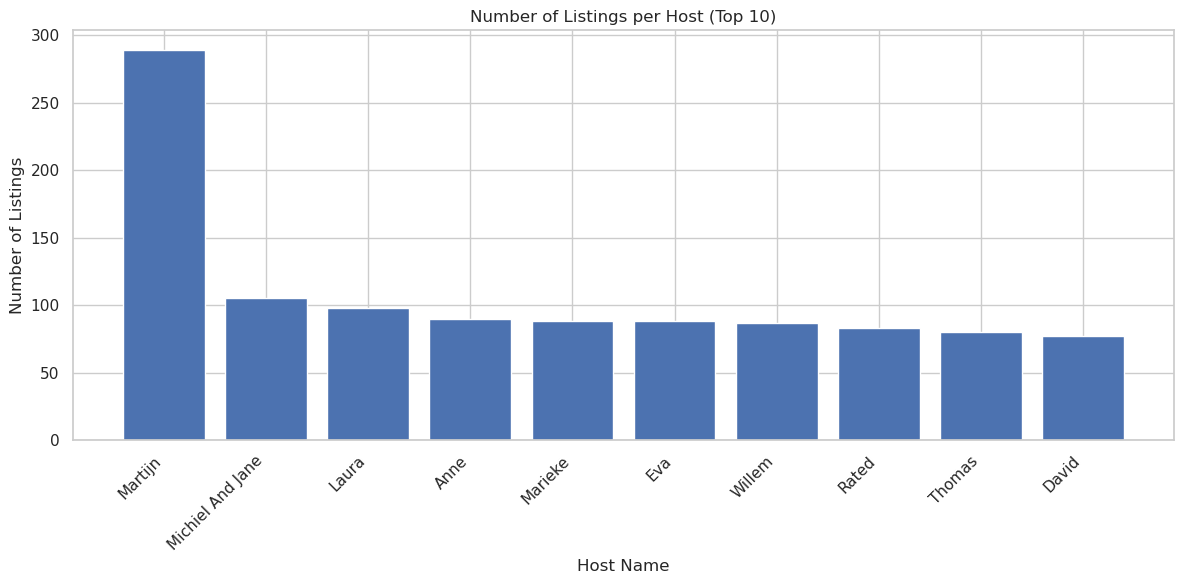

In [630]:
#Distribution of the number of listings per host (top 10).

listings_per_host=df_listing.groupBy('host_name')\
    .agg(f.count('Listing_name').alias('listing_count'))\
    .orderBy('listing_count',ascending=False)



listings_per_host_pd=listings_per_host.toPandas()
listings_per_host_pd=listings_per_host_pd.head(10)
listings_per_host.show()

plt.figure(figsize=(12, 6))
plt.bar(listings_per_host_pd['host_name'], listings_per_host_pd['listing_count'])
plt.title('Number of Listings per Host (Top 10)')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [631]:
## Drop rows with NaN values in any column
#df_listing = df_listing.dropna()

In [632]:
#Analyze the response time and rate of hosts.

df_rate_response=df_listing.groupBy('host_response_time') \
    .agg(
        f.avg(f.col('host_response_rate')).alias('avg_response_rate'),
    ) 


df_rate_response = df_rate_response.filter(~f.isnan(f.col('host_response_time'))).show()



+------------------+-----------------+
|host_response_time|avg_response_rate|
+------------------+-----------------+
|a few days or more|16.69182389937107|
|      within a day|89.02367109634551|
|within a few hours|93.95404939689834|
|    within an hour|98.90375586854461|
+------------------+-----------------+



23/12/31 20:40:42 WARN TaskSetManager: Stage 1852 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


23/12/31 20:40:42 WARN TaskSetManager: Stage 1855 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:43 WARN TaskSetManager: Stage 1863 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+---------------+-----------------+
|    Super hosts|    average_price|
+---------------+-----------------+
|      Marjolijn|            800.0|
|      Alexandra|            633.0|
|        Michaël|            575.0|
|          Matan|            525.0|
|       Brigitte|            525.0|
|      Anastasia|            500.0|
|       Cristian|            500.0|
|         Marnie|            495.0|
|    Jo & Wouter|            475.0|
|Zeiltjalk LOTUS|            470.0|
|           Jona|            450.0|
|        Marcela|            450.0|
|      Stephanie|            450.0|
|        Grietje|            450.0|
|    Bob & Menno|437.6666666666667|
|          Tessy|            425.0|
| Merel & Pieter|            425.0|
|          Elwin|            420.0|
|           Anke|            401.5|
| Tiemen & Gaudi|            400.0|
+---------------+-----------------+
only showing top 20 rows



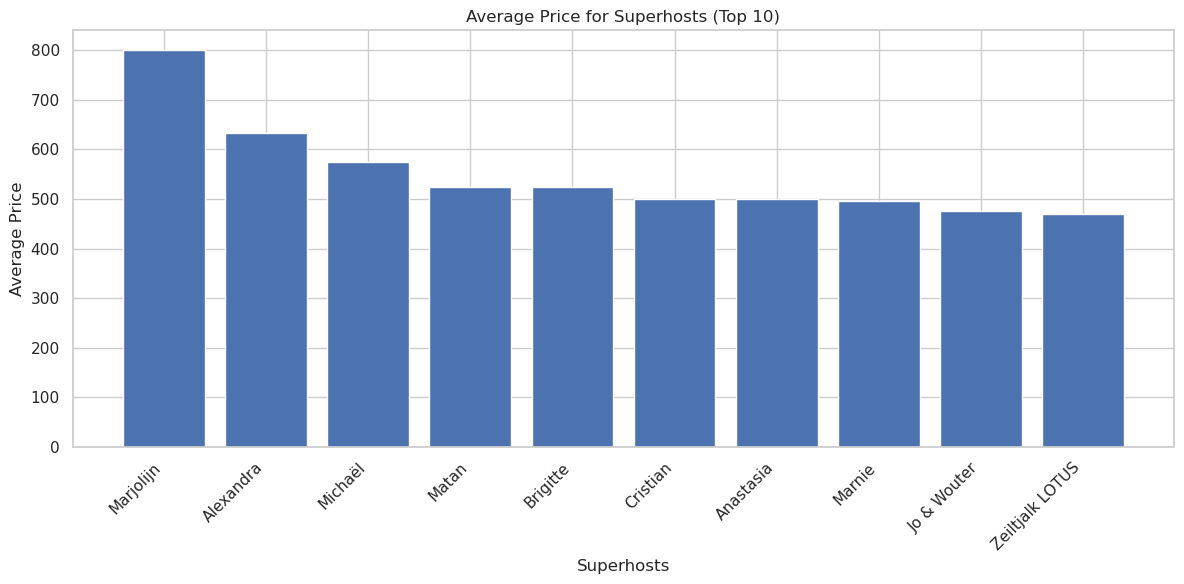

23/12/31 20:40:44 WARN TaskSetManager: Stage 1866 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:44 WARN TaskSetManager: Stage 1874 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+-----------------+
|        All_hosts|    average_price|
+-----------------+-----------------+
|   Anubisdelvalle|           5040.0|
|          Faralda|           1712.5|
|             Khan|           1500.0|
|          JanDirk|           1200.0|
|            Mical|           1050.0|
|             Hedy|            999.0|
|            Nilay|            900.0|
|          NicoPeg|            900.0|
|  Casper & Simone|            896.0|
|          Wichard|            875.0|
|Martine & Richard|            800.0|
|             Ozzy|            800.0|
|             Aram|            750.0|
|           Minouk|            745.0|
|         Brechtje|            702.5|
|        Averechts|            695.0|
|         Kristyna|            680.0|
| Cesar & Floortje|            675.0|
|             Ebru|            650.0|
|           Holger|644.6666666666666|
+-----------------+-----------------+
only showing top 20 rows



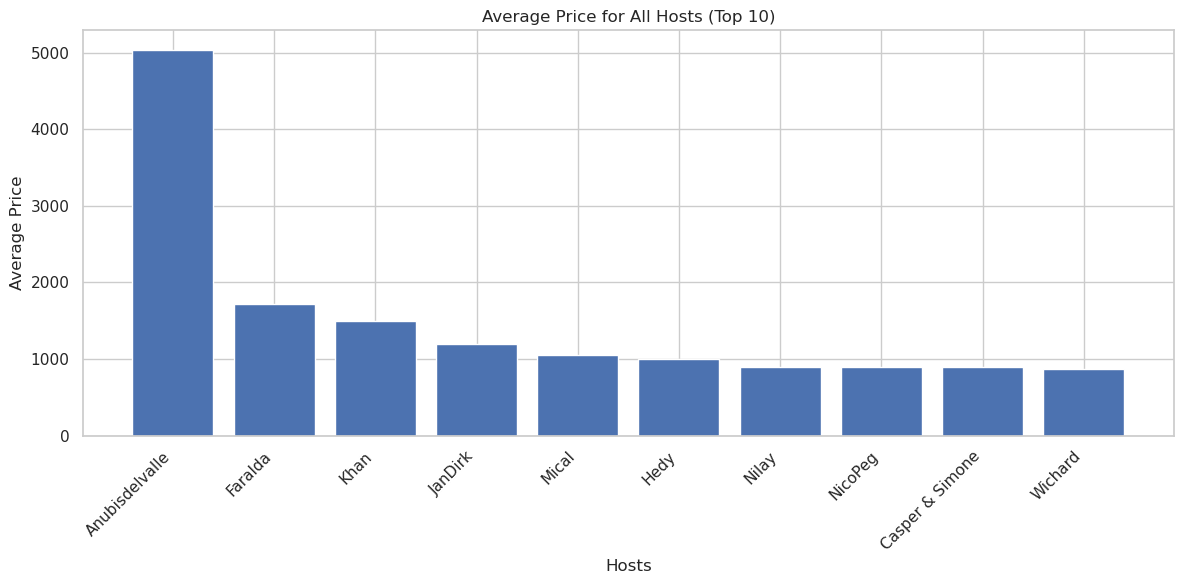

In [633]:
#Identify superhosts and their impact on pricing and reviews.

#average price for superhosts
superhosts = df_listing.filter(f.col('Superhost_status') == 'True')

avg_price_superhost=superhosts.groupBy('host_name')\
    .agg(f.avg('price')
    .alias('average_price'))\
    .orderBy('average_price',ascending=False)\
    .withColumnRenamed("host_name", "Super hosts")\

avg_price_superhost_pd=avg_price_superhost.toPandas()
avg_price_superhost_pd=avg_price_superhost_pd.head(10)
avg_price_superhost.show()



plt.figure(figsize=(12, 6))
plt.bar(avg_price_superhost_pd['Super hosts'], avg_price_superhost_pd['average_price'])
plt.title('Average Price for Superhosts (Top 10)')
plt.xlabel('Superhosts')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()





#average price for all hosts
average_price_for_all_hosts=df_listing.groupBy('host_name')\
    .agg(f.avg('price')\
    .alias('average_price'))\
    .orderBy('average_price',ascending=False)\
    .withColumnRenamed("host_name", "All_hosts")\
    

average_price_for_all_hosts_pd=average_price_for_all_hosts.toPandas()
average_price_for_all_hosts_pd=average_price_for_all_hosts_pd.head(10)
average_price_for_all_hosts.show()



# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(average_price_for_all_hosts_pd['All_hosts'], average_price_for_all_hosts_pd['average_price'])
plt.title('Average Price for All Hosts (Top 10)')
plt.xlabel('Hosts')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()






23/12/31 20:40:45 WARN TaskSetManager: Stage 1877 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:45 WARN TaskSetManager: Stage 1885 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+---------------+
|        Super hosts|average_reviews|
+-------------------+---------------+
|       Kim & Daniel|          402.0|
|          Elisabeth|          395.0|
|        Thomas&Eyal|          393.0|
|            William|          370.0|
|   Erik And Mary Jo|          362.5|
|              Sonja|          360.0|
|            Henrica|          350.0|
|              Mulan|          350.0|
|              Edith|          348.0|
| Lisa En Peter Paul|          346.0|
|                 Jo|          337.0|
|      Karin & Douwe|          337.0|
|Marielle And Tobias|          336.0|
|            Wilbert|          327.5|
|               Roel|          324.5|
|          Henriette|          320.0|
|       Jan-Tjalling|          313.0|
|              Renée|          309.0|
|          Gabriella|          308.0|
|            Reinout|          299.5|
+-------------------+---------------+
only showing top 20 rows



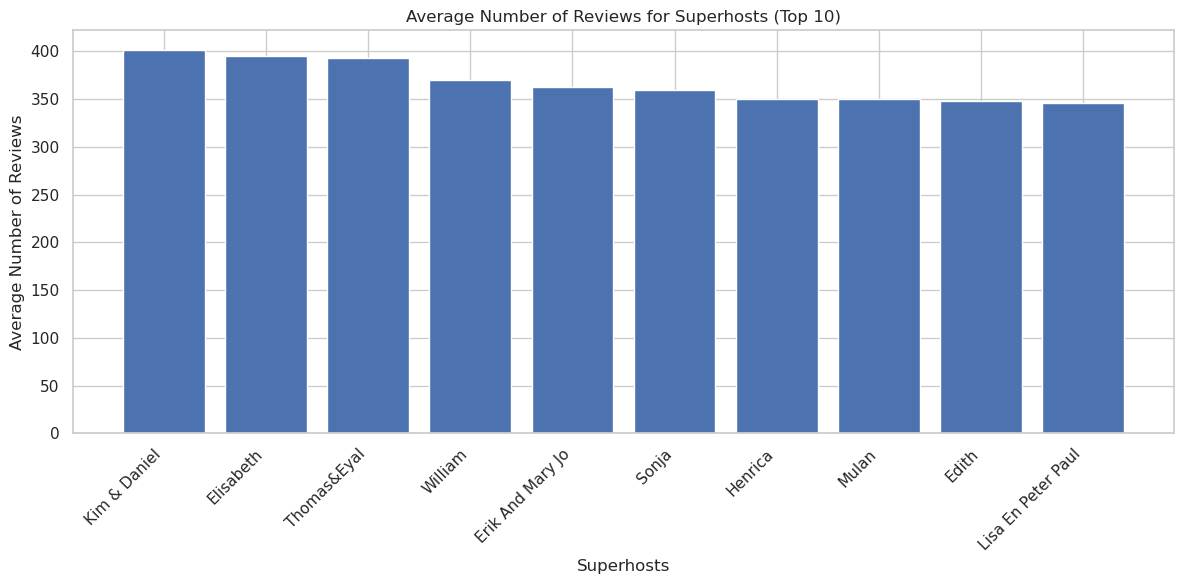

23/12/31 20:40:46 WARN TaskSetManager: Stage 1888 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:47 WARN TaskSetManager: Stage 1896 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+---------------+
|          All_hosts|average_reviews|
+-------------------+---------------+
|          Max Osole|          580.0|
|    Nina & Benjamin|          490.0|
|       Kim & Daniel|          402.0|
|            Nicolet|          394.0|
|        Thomas&Eyal|          393.0|
|           Reinhart|          375.5|
|   Erik And Mary Jo|          362.5|
|             Shawna|          353.0|
|            Henrica|          350.0|
|              Mulan|          350.0|
| Lisa En Peter Paul|          346.0|
|      Karin & Douwe|          337.0|
|Marielle And Tobias|          336.0|
|       Jan-Tjalling|          313.0|
|    Wendie And Hans|          294.5|
|                Ned|          292.0|
|          Madelinde|          286.0|
|             Flávio|          277.5|
|       Misak & Kors|          273.0|
|Lastenia & Veronica|          273.0|
+-------------------+---------------+
only showing top 20 rows



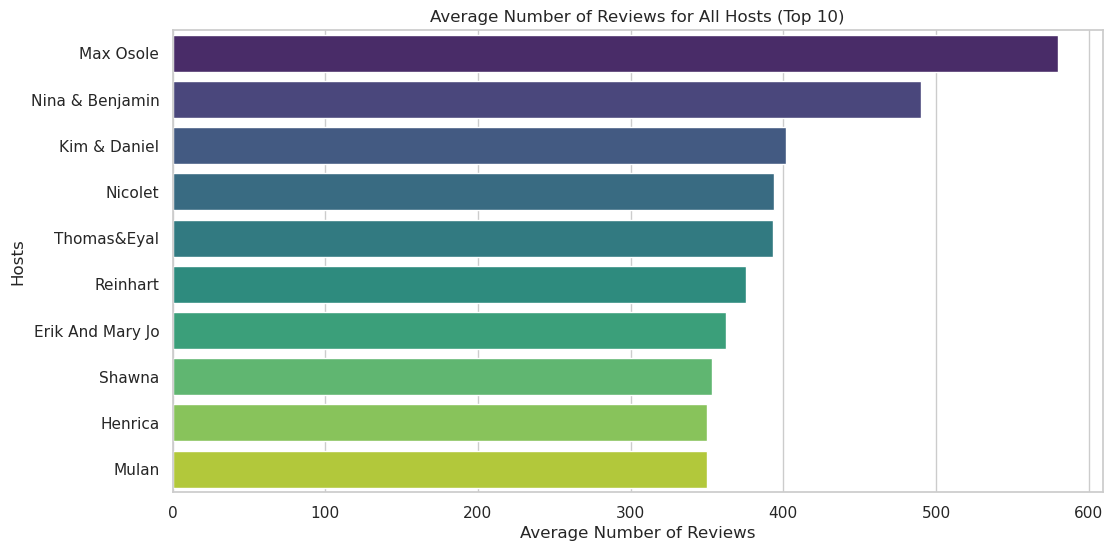

In [634]:


#average review for superhosts
average_review_for_superhosts=superhosts.groupBy('host_name')\
    .agg(f.avg('Num_reviews')\
    .alias('average_reviews'))\
    .orderBy('average_reviews',ascending=False)\
    .withColumnRenamed("host_name", "Super hosts")\




average_review_for_superhosts_pd=average_review_for_superhosts.toPandas()
average_review_for_superhosts_pd=average_review_for_superhosts_pd.head(10)
average_review_for_superhosts.show()



plt.figure(figsize=(12, 6))
plt.bar(average_review_for_superhosts_pd['Super hosts'], average_review_for_superhosts_pd['average_reviews'])
plt.title('Average Number of Reviews for Superhosts (Top 10)')
plt.xlabel('Superhosts')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()







#average review for all hosts
average_review_for_all_hosts=df_listing.groupBy('host_name')\
    .agg(f.avg('Num_reviews')\
    .alias('average_reviews'))\
    .orderBy('average_reviews',ascending=False)\
    .withColumnRenamed("host_name", "All_hosts")\


average_review_for_all_hosts_pd=average_review_for_all_hosts.toPandas()
average_review_for_all_hosts_pd=average_review_for_all_hosts_pd.head(10)
average_review_for_all_hosts.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='average_reviews', y='All_hosts', data=average_review_for_all_hosts_pd, palette='viridis')
plt.title('Average Number of Reviews for All Hosts (Top 10)')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Hosts')
plt.show()

# Review Analysis:

# Time Trends

In [635]:
df_listing.cache()

23/12/31 20:40:47 WARN CacheManager: Asked to cache already cached data.


DataFrame[Listing_id: int, Listing_name: string, Host_id: int, Host_name: string, Neighborhood: string, Latitude: float, Longitude: float, Room_type: string, Price: int, Min_nights: int, Num_reviews: int, Last_review: timestamp, Reviews_per_month: float, calculated_host_listings_count: int, Availability_365: int, Street_address: string, Host_response_time: string, Host_response_rate: float, Superhost_status: boolean, Host_listings_count: float, Host_total_listings_count: float, Cleansed_neighborhood: string, Property_type: string, Accommodates: int, Bathrooms: int, Bedrooms: int, Beds: int, Amenities: string, Square_feet: float, Weekly_price($): int, Monthly_price($): int, Security_deposit($): int, Cleaning_fee($): int, Max_nights: int, Availability_30: int, Availability_60: int, Availability_90: int, Review_scores_rating: float, Review_scores_cleanliness: float, Review_scores_value: float, Instant_bookable: boolean, Cancellation_policy: string]

In [636]:
#Analyze trends over time for pricing, availability, and reviews.

last_review=df_listing.withColumn('review_year',f.year('last_review'))
last_review=last_review.withColumn('review_month',f.month('last_review'))

23/12/31 20:40:48 WARN TaskSetManager: Stage 1899 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:49 WARN TaskSetManager: Stage 1907 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-----------+------------+------------------+---------------------+------------------+
|review_year|review_month|count(Num_reviews)|avg(availability_365)|        avg(price)|
+-----------+------------+------------------+---------------------+------------------+
|       2018|          12|              1032|   112.00872093023256|128.72093023255815|
|       2018|          11|              3618|    99.26395798783858|143.03537866224434|
|       2018|          10|              2363|    73.80448582310622|165.13922979263648|
|       2018|           9|              1536|   59.883463541666664|     151.884765625|
|       2018|           8|              1622|   40.403822441430336|166.63933415536374|
|       2018|           7|               881|   56.180476730987515|   160.05561861521|
|       2018|           6|               560|   57.426785714285714|154.70714285714286|
|       2018|           5|               519|   42.385356454720615|155.03275529865124|
|       2018|           4|               39

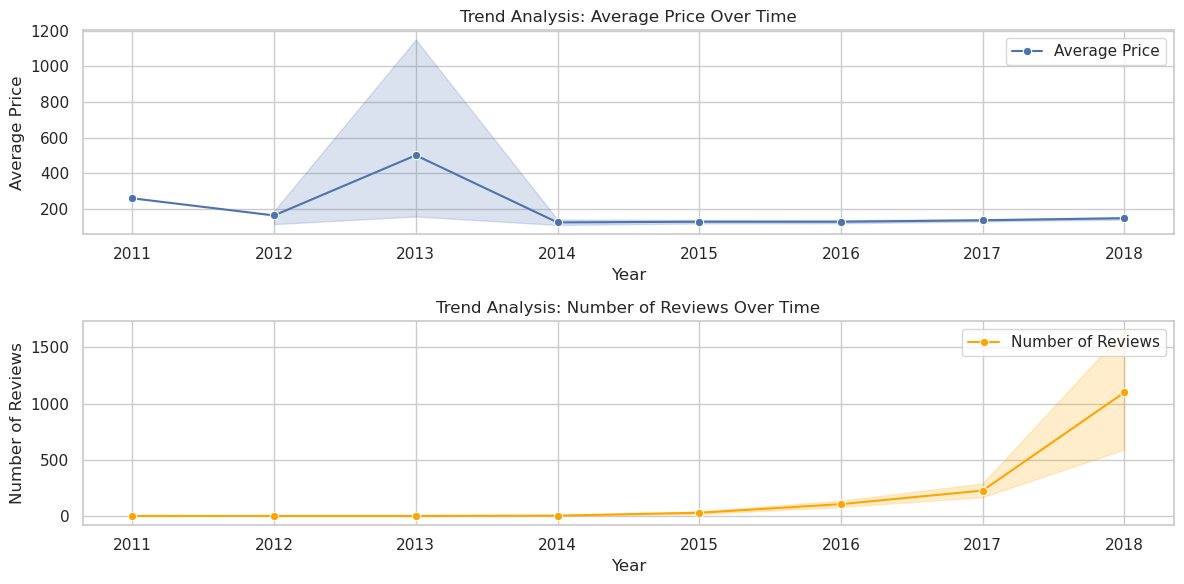

In [637]:
trend_analysis = last_review.groupBy('review_year', 'review_month')\
    .agg({'price': 'avg', 'availability_365': 'avg', 'Num_reviews': 'count'})\
    .orderBy('review_year', 'review_month',ascending=False)

trend_analysis = trend_analysis.filter(f.col('review_year').isNotNull())
trend_analysis_pd=trend_analysis.toPandas()
trend_analysis.show()






plt.figure(figsize=(12, 6))

# Plot average price
plt.subplot(2, 1, 1)
sns.lineplot(x='review_year', y='avg(price)', data=trend_analysis_pd, marker='o', label='Average Price')
plt.title('Trend Analysis: Average Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()

# Plot number of reviews
plt.subplot(2, 1, 2)
sns.lineplot(x='review_year', y='count(Num_reviews)', data=trend_analysis_pd, marker='o', label='Number of Reviews', color='orange')
plt.title('Trend Analysis: Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()

plt.tight_layout()
plt.show()










23/12/31 20:40:50 WARN TaskSetManager: Stage 1910 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:51 WARN TaskSetManager: Stage 1918 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+-------------+------------------+---------------------+------------------+
|review_months|count(Num_reviews)|avg(availability_365)|        avg(price)|
+-------------+------------------+---------------------+------------------+
|           12|              1322|    91.46369137670197|127.52647503782148|
|           11|              3925|    93.02624203821657|141.45273885350318|
|           10|              2903|     64.9586634516018| 165.3913193248364|
|            9|              2113|    51.43918599148131| 151.1722669190724|
|            8|              2424|   31.482260726072607| 157.0111386138614|
|            7|              1312|   45.052591463414636| 151.8064024390244|
|            6|               884|    45.19117647058823|149.41742081447964|
|            5|               895|    38.58435754189944|147.47486033519553|
|            4|               653|   41.036753445635526|146.97243491577336|
|            3|               288|   19.729166666666668|131.60069444444446|
|           

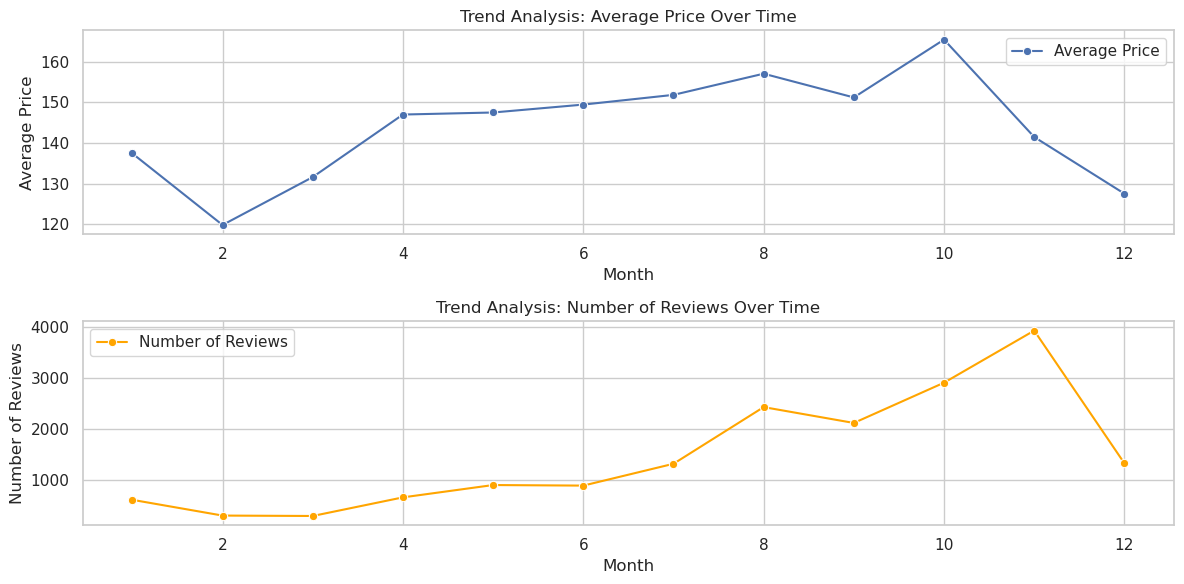

In [638]:
#Identify seasonal patterns in pricing


seasonal_analysis = df_listing.withColumn('review_months', f.month('last_review'))

seasonal_analysis = seasonal_analysis.groupBy('review_months')\
    .agg({'price': 'avg', 'availability_365': 'avg', 'Num_reviews': 'count'})\
    .orderBy( 'review_months',ascending=False)

seasonal_analysis = seasonal_analysis.filter(f.col('review_months').isNotNull())
seasonal_analysis_pd=seasonal_analysis.toPandas()
seasonal_analysis.show()


plt.figure(figsize=(12, 6))

# Plot average price
plt.subplot(2, 1, 1)
sns.lineplot(x='review_months', y='avg(price)', data=seasonal_analysis_pd, marker='o', label='Average Price')
plt.title('Trend Analysis: Average Price Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend()

# Plot number of reviews
plt.subplot(2, 1, 2)
sns.lineplot(x='review_months', y='count(Num_reviews)', data=seasonal_analysis_pd, marker='o', label='Number of Reviews', color='orange')
plt.title('Trend Analysis: Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend()

plt.tight_layout()
plt.show()





In [639]:
df_listing.select('last_review').show()

+-------------------+
|        last_review|
+-------------------+
|2018-11-28 00:00:00|
|2018-08-29 00:00:00|
|2018-11-30 00:00:00|
|2018-01-21 00:00:00|
|2018-11-25 00:00:00|
|2018-11-19 00:00:00|
|2018-12-03 00:00:00|
|2018-12-05 00:00:00|
|2017-10-16 00:00:00|
|2018-10-07 00:00:00|
|2018-11-24 00:00:00|
|2018-02-18 00:00:00|
|2018-10-01 00:00:00|
|2018-11-18 00:00:00|
|2018-10-21 00:00:00|
|2018-01-03 00:00:00|
|2018-11-03 00:00:00|
|2018-12-04 00:00:00|
|2018-11-18 00:00:00|
|2018-08-24 00:00:00|
+-------------------+
only showing top 20 rows



23/12/31 20:40:52 WARN TaskSetManager: Stage 1921 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


# Cancellation Policy Analysis:

In [640]:
#Distribution of cancellation policies.

23/12/31 20:40:52 WARN TaskSetManager: Stage 1922 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:52 WARN TaskSetManager: Stage 1930 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+---------------------------+-----+
|cancellation_policy        |count|
+---------------------------+-----+
|strict_14_with_grace_period|7872 |
|moderate                   |7384 |
|flexible                   |4723 |
|super_strict_60            |46   |
+---------------------------+-----+



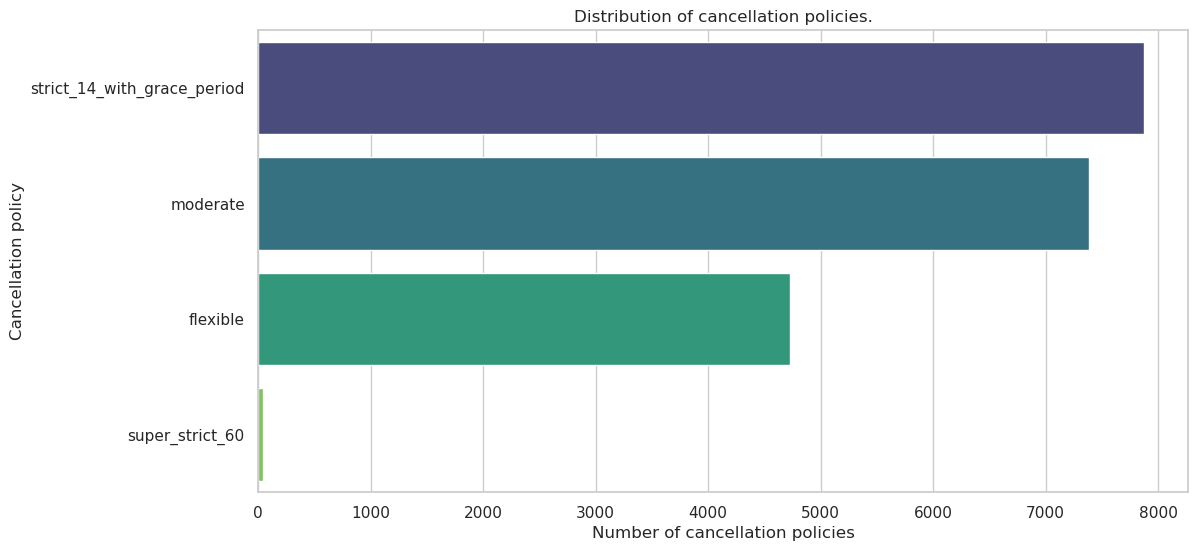

In [641]:
cancellation_policy_distribution = df_listing.groupBy('cancellation_policy')\
.count()\
.orderBy('count', ascending=False)
cancellation_policy_distribution

cancellation_policy_distribution_pd=cancellation_policy_distribution.toPandas()

cancellation_policy_distribution.show(truncate=False)

# Plot distribution of cancellation policies.
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='cancellation_policy', data=cancellation_policy_distribution_pd, palette='viridis')
plt.title('Distribution of cancellation policies.')
plt.xlabel('Number of cancellation policies')
plt.ylabel('Cancellation policy')
plt.show()


23/12/31 20:40:53 WARN TaskSetManager: Stage 1933 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


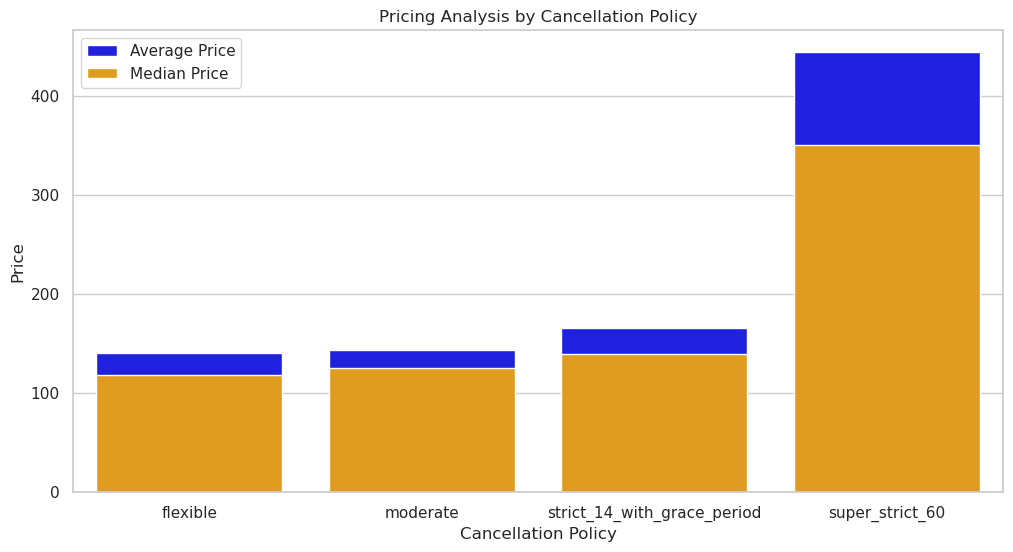

23/12/31 20:40:54 WARN TaskSetManager: Stage 1936 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


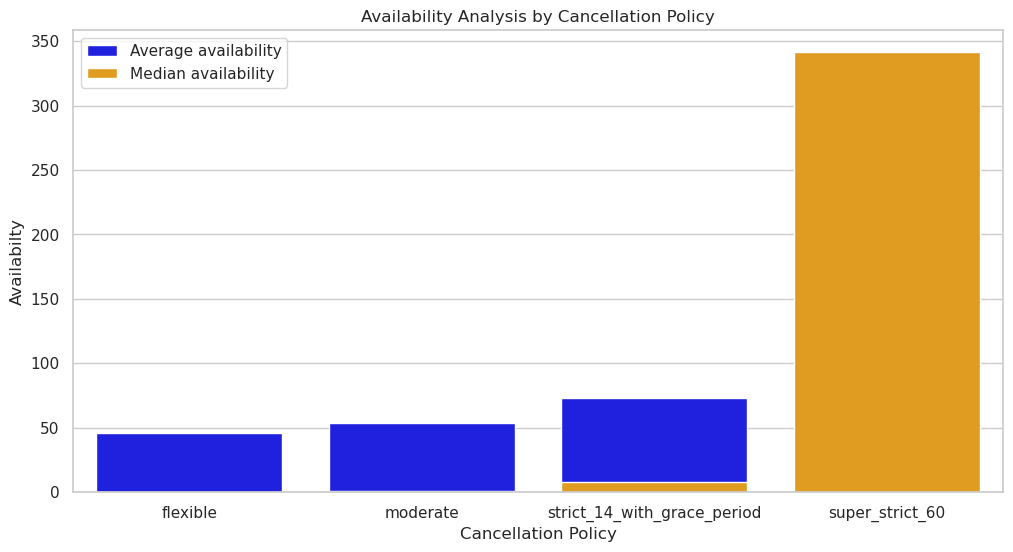

23/12/31 20:40:54 WARN TaskSetManager: Stage 1939 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:40:55 WARN TaskSetManager: Stage 1942 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+------------------+------------+
| cancellation_policy|     average_price|median_price|
+--------------------+------------------+------------+
|            flexible|140.11200508151597|       118.0|
|            moderate| 143.3569880823402|       125.0|
|strict_14_with_gr...|  166.005462398374|       139.0|
|     super_strict_60| 444.2826086956522|       350.0|
+--------------------+------------------+------------+

+--------------------+--------------------+-------------------+
| cancellation_policy|average_availability|median_availability|
+--------------------+--------------------+-------------------+
|            flexible|   46.05822570400169|                0.0|
|            moderate|  53.229414951245936|                1.0|
|strict_14_with_gr...|   72.97472052845528|                8.0|
|     super_strict_60|  320.30434782608694|              341.5|
+--------------------+--------------------+-------------------+



In [642]:
#the impact of cancellation policies on pricing and availability.

pricing_analysis = df_listing.groupBy("cancellation_policy").agg(
    f.avg("price").alias("average_price"),
    f.median("price").alias("median_price")
)


pricing_analysis_pd = pricing_analysis.toPandas()

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for average price
sns.barplot(x='cancellation_policy', y='average_price', data=pricing_analysis_pd, color='blue', label='Average Price')

# Bar plot for median price
sns.barplot(x='cancellation_policy', y='median_price', data=pricing_analysis_pd, color='orange', label='Median Price')

plt.title('Pricing Analysis by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Price')
plt.legend()
plt.show()



# group by cancellation_policy and analyze availability
availability_analysis = df_listing.groupBy("cancellation_policy").agg(
    f.avg("availability_365").alias("average_availability"),
    f.median("availability_365").alias("median_availability")
)




availability_analysis_pd = availability_analysis.toPandas()

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for average price
sns.barplot(x='cancellation_policy', y='average_availability', data=availability_analysis_pd, color='blue', label='Average availability')

# Bar plot for median price
sns.barplot(x='cancellation_policy', y='median_availability', data=availability_analysis_pd, color='orange', label='Median availability')

plt.title('Availability Analysis by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Availabilty')
plt.legend()
plt.show()





# show the results
pricing_analysis.show()
availability_analysis.show()

# Spark MLib:Linear regression model to predict listing prices based on features like: bedrooms, bathrooms, amenities

In [643]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder,CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

In [562]:
df=df_listing.withColumn('amenities_count',f.size(f.split(f.col('amenities'),',')))

In [563]:
df.select('amenities_count').show()

+---------------+
|amenities_count|
+---------------+
|             36|
|             27|
|             19|
|             19|
|             20|
|             25|
|             19|
|             20|
|             26|
|             31|
|             22|
|             35|
|             28|
|             30|
|             15|
|             21|
|             21|
|             29|
|             16|
|             16|
+---------------+
only showing top 20 rows



23/12/31 20:38:16 WARN TaskSetManager: Stage 1666 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


In [564]:
selected_columns=['bedrooms','bathrooms','amenities_count','price']

In [565]:
df_selected=df.select(selected_columns)

In [566]:
df_selected=df_selected.dropna()

In [567]:
feature_columns=['bedrooms','bathrooms','amenities_count']

In [568]:
assembler=VectorAssembler(inputCols=feature_columns,outputCol='features')
df_vectorized=assembler.transform(df_selected)

In [569]:
df_vectorized.show()

23/12/31 20:38:18 WARN TaskSetManager: Stage 1667 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


+--------+---------+---------------+-----+--------------+
|bedrooms|bathrooms|amenities_count|price|      features|
+--------+---------+---------------+-----+--------------+
|     1.0|      1.5|             36|   59|[1.0,1.5,36.0]|
|     2.0|      1.0|             27|  160|[2.0,1.0,27.0]|
|     1.0|      1.0|             19|   80|[1.0,1.0,19.0]|
|     1.0|      1.0|             19|  125|[1.0,1.0,19.0]|
|     1.0|      1.0|             20|  150|[1.0,1.0,20.0]|
|     1.0|      1.0|             25|   65|[1.0,1.0,25.0]|
|     1.0|      1.0|             20|   55|[1.0,1.0,20.0]|
|     3.0|      1.0|             26|  219|[3.0,1.0,26.0]|
|     1.0|      0.0|             31|  180|[1.0,0.0,31.0]|
|     1.0|      1.0|             22|  159|[1.0,1.0,22.0]|
|     1.0|      1.0|             35|  100|[1.0,1.0,35.0]|
|     1.0|      1.5|             28|  250|[1.0,1.5,28.0]|
|     2.0|      1.0|             30|  200|[2.0,1.0,30.0]|
|     1.0|      1.0|             15|  155|[1.0,1.0,15.0]|
|     1.0|    

In [570]:
(training_data,testing_data)=df_vectorized.randomSplit([0.8,0.2],seed=42)

In [571]:
lr=LinearRegression(featuresCol='features',labelCol='price')

In [572]:
model=lr.fit(training_data)

23/12/31 20:38:20 WARN Instrumentation: [406a8821] regParam is zero, which might cause numerical instability and overfitting.
23/12/31 20:38:20 WARN TaskSetManager: Stage 1668 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:38:21 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/12/31 20:38:21 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
23/12/31 20:38:22 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
23/12/31 20:38:22 WARN TaskSetManager: Stage 1669 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


In [573]:
predictions = model.transform(testing_data)

In [574]:
evaluator=RegressionEvaluator(labelCol='price',metricName='rmse')
rmse=evaluator.evaluate(predictions)
print(f'Root mean squared error :{rmse}')

23/12/31 20:38:24 WARN TaskSetManager: Stage 1670 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


Root mean squared error :108.7355616481053


In [575]:

target_variable_range = df_listing.agg({"price": "max"}).collect()[0][0] - df_listing.agg({"price": "min"}).collect()[0][0]
HIGH=df_listing.agg({"price": "max"}).collect()[0][0]
LOW=df_listing.agg({"price": "min"}).collect()[0][0]

# Normalized RMSE
nrmse = rmse / target_variable_range
print(f"Normalized RMSE: {nrmse}")


23/12/31 20:38:24 WARN TaskSetManager: Stage 1671 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:38:24 WARN TaskSetManager: Stage 1674 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:38:25 WARN TaskSetManager: Stage 1677 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


Normalized RMSE: 0.012792419017424153


23/12/31 20:38:25 WARN TaskSetManager: Stage 1680 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


In [576]:
target_variable_range,HIGH,LOW

(8500, 8500, 0)

In [577]:
param_grid=ParamGridBuilder().addGrid(lr.regParam,[0.1,0.01]).build()
crossval=CrossValidator(estimator=lr, estimatorParamMaps=param_grid,evaluator=evaluator,numFolds=3)
cv_model=crossval.fit(training_data)
best_model=cv_model.bestModel
best_model.save('best_model_regresion',overwrite=True)

23/12/31 20:38:26 WARN TaskSetManager: Stage 1683 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:38:26 WARN TaskSetManager: Stage 1684 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:38:27 WARN TaskSetManager: Stage 1685 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:38:27 WARN TaskSetManager: Stage 1686 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:38:27 WARN TaskSetManager: Stage 1687 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:38:28 WARN TaskSetManager: Stage 1688 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.
23/12/31 20:38:28 WARN TaskSetManager: Stage 1689 contains a task of very large size (2796 KiB). The maximum recommended task size is 10

In [578]:
predictions_cv=best_model.transform(testing_data)

In [579]:
rmse_cv=evaluator.evaluate(predictions_cv)
print(f"root mean squared error for cross validation: {rmse_cv}")


root mean squared error for cross validation: 108.73563082133269


23/12/31 20:38:36 WARN TaskSetManager: Stage 1709 contains a task of very large size (2796 KiB). The maximum recommended task size is 1000 KiB.


# Redshift_ingestion through s3 (copy command)

In [646]:
df_listing=df_listing.drop('amenities')

In [647]:
df_listing=df_listing.withColumn('last_review',f.col('last_review').cast('string'))

In [648]:
column_names=df_listing.columns
for column_name in column_names:
    df_listing = df_listing.withColumn(column_name, f.regexp_replace(f.col(column_name), '"', ''))

In [ ]:
def write_df_to_csv(filename):
    num_output_files = 1  
    df_listing = df_listing.repartition(num_output_files)

    # Write the DataFrame to a CSV file
    df_listing.write.csv(filename, mode="overwrite")

In [ ]:
write_df_to_csv('listings_to_aws')

In [ ]:
import os
def delete_success_file(success_file_path):
    # Check if the success file exists before attempting to delete it
    if os.path.exists(success_file_path):
        os.remove(success_file_path)
        print(f'Success file {success_file_path} deleted.')
    else:
        print(f'Success file {success_file_path} not found.')

In [ ]:
delete_success_file('listings_to_aws/_SUCCESS')

In [ ]:
def csv_file(directory_path):
    # List all files in the directory
    files = os.listdir(directory_path)

    # Filter for CSV files
    csv_files = [file for file in files if file.endswith('.csv')]

    # Check if there is exactly one CSV file
    if len(csv_files) == 1:
        csv_file_path = os.path.join(directory_path, csv_files[0])
        print(f'Path to CSV file: {csv_file_path}')
    else:
        print('Error: There should be exactly one CSV file in the directory.')
        
    return str(csv_file_path)    

In [653]:
import boto3
import psycopg2
from botocore.exceptions import NoCredentialsError

# Replace these values with your own
aws_access_key_id = 'Yours'
aws_secret_access_key = 'Yours'
redshift_user = 'Yours'
redshift_password = 'Yours'
redshift_host = 'Yours'
redshift_port = 'Yours'
redshift_db = 'Yours'
s3_bucket = 'Yours'
local_csv_file = csv_file('listings_to_aws')
s3_key = 'amesterdam_airbnb/listings.csv'

# Upload local CSV file to S3
def upload_to_s3(local_file, bucket, s3_key, access_key, secret_key):
    s3 = boto3.client('s3', aws_access_key_id=access_key, aws_secret_access_key=secret_key)

    try:
        s3.upload_file(local_file, bucket, s3_key)
        print(f"Upload successful: {local_file} to s3://{bucket}/{s3_key}")
        return True
    except FileNotFoundError:
        print(f"The file {local_file} was not found.")
        return False
    except NoCredentialsError:
        print("Credentials not available")
        return False

# Upload the local CSV file to S3
upload_to_s3(local_csv_file, s3_bucket, s3_key, aws_access_key_id, aws_secret_access_key)

# Establish a connection to Redshift
conn = psycopg2.connect(
    dbname=redshift_db,
    user=redshift_user,
    password=redshift_password,
    host=redshift_host,
    port=redshift_port
)

# Create a cursor
cursor = conn.cursor()

# Specify the COPY command
copy_command = f"""
COPY test_env.listings
FROM 's3://{s3_bucket}/{s3_key}'
CREDENTIALS 'aws_access_key_id={aws_access_key_id};aws_secret_access_key={aws_secret_access_key}'
CSV
IGNOREHEADER 1
TRIMBLANKS
;
"""

# Execute the COPY command
cursor.execute(copy_command)

# Commit the transaction
conn.commit()

# Close the cursor and connection
cursor.close()
conn.close()


Upload successful: listings_to_aws/part-00000-bcdb4300-7192-483b-911c-9a885afe8a93-c000.csv to s3://airbnbamesterdamo/amesterdam_airbnb/listings.csv
